# ラベル画像から矩形を抽出する

In [1]:
from __future__ import unicode_literals
from __future__ import print_function
import sys
import os
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import re

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (9, 6) # グラフの表示サイズを変更

In [2]:
sys.version_info

sys.version_info(major=2, minor=7, micro=13, releaselevel='final', serial=0)

In [3]:
cv2.__version__

'3.1.0'

In [4]:
data_path = os.path.join('..', 'contest', 'APC')

In [5]:
path = os.path.join(data_path, 'Single', 'mask_label', 'item_table.csv')
df = pd.read_csv(path, encoding='cp932')
df.head(3)

,class,r,g,b
0,1,128,0,0
1,2,255,0,0
2,3,0,128,0


In [6]:
path = os.path.join(data_path, 'Single', 'mask_label', 'single', '1', '1', 'label.bmp')
labels_image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
labels_image.shape

(960, 1280, 3)

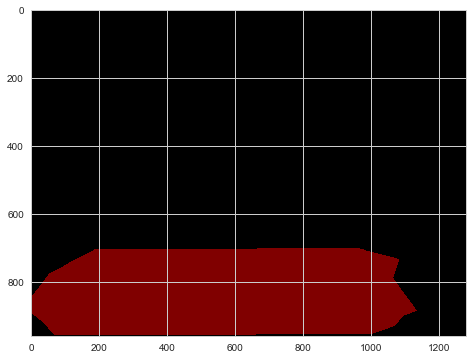

In [7]:
plt.imshow(labels_image)

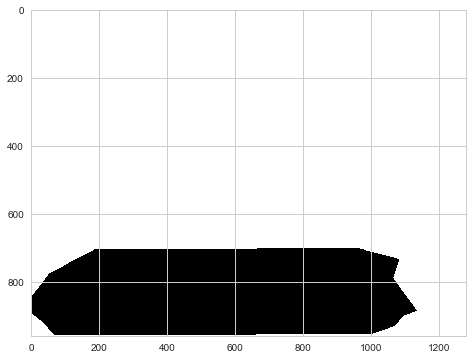

In [8]:
# グレースケール化
labels_gray = cv2.cvtColor(labels_image, cv2.COLOR_BGR2GRAY)

# 2値化
_, labels_binary = cv2.threshold(labels_gray, 0, 255, cv2.THRESH_BINARY)
#labels_binary = cv2.bitwise_not(labels_binary)
plt.imshow(labels_binary)

In [9]:
_, _, stats, centroids = cv2.connectedComponentsWithStats(labels_gray)
stats, centroids

(array([[     0,      0,   1280,    960, 970215],
        [     4,    702,   1132,    256, 258585]]),
 array([[ 659.67188304,  385.36086228],
        [ 563.81477657,  832.71153006]]))

In [10]:
columns = ['x', 'y', 'w', 'h', 'class']
df_reg = pd.DataFrame(columns=['x', 'y', 'w', 'h', 'class'])

for stat, centroid in zip(stats, centroids):
    region_x, region_y, region_w, region_h, _ = stat[0], stat[1], stat[2], stat[3], stat[4]
    centor_x, centor_y = int(math.floor(centroid[1])), int(math.floor(centroid[0]))
    if region_w * region_h <= (2 * labels_image.shape[1]):
        continue
    if region_w * region_h >= (labels_image.shape[0] * labels_image.shape[1] * 0.95):
        continue
    r, g, b = labels_image[centor_x][centor_y]
    clazz = int(df[(df['r'] == r) & (df['g'] == g) & (df['b'] == b)]['class'].values[0])
    df_reg = df_reg.append(pd.Series([region_x, region_y, region_w, region_h, clazz],
                                     index=columns),
                           ignore_index=True)

df_reg

,x,y,w,h,class
0,4.0,702.0,1132.0,256.0,1.0


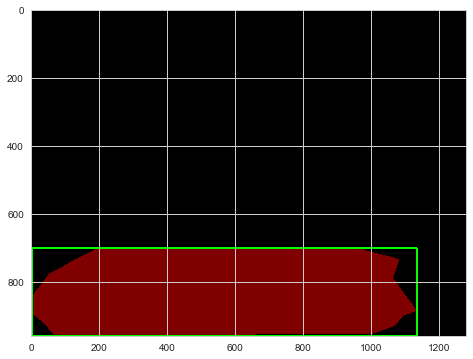

In [11]:
bounding_image = np.copy(labels_image)
for stat in stats:
    x, y, w, h, _ = stat[0], stat[1], stat[2], stat[3], stat[4]
    if w * h >= (labels_image.shape[0] * labels_image.shape[1] * 0.95):
        continue
    cv2.rectangle(bounding_image, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(bounding_image)

In [12]:
print ('\nfinished')


finished


In [13]:
path = os.path.join(data_path, 'Single', 'mask_label', 'single', '1', '1', 'label.bmp')
os.path.split(path)

(u'..\\contest\\APC\\Single\\mask_label\\single\\1\\1', u'label.bmp')